# Investment Analysis

## Checkpoint 1: Data Cleaning

In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# reading companies csv file
companies = pd.read_csv('companies.csv',encoding='palmos',engine='python')
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [4]:
# reading rounds2 csv file
rounds2 = pd.read_csv('rounds2.csv',encoding='palmos',engine='python')
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [5]:
# Finding the number of unique values in rounds2 DataFrame - company_permalink column
len(rounds2.company_permalink.unique())

90247

In [6]:
# Finding the number of unique values in companies DataFrame - permalink column
len(companies.permalink.unique())

66368

Ideally, the ```permalink``` column in the companies dataframe should be the unique_key of the table, having 66368 unique company names (links, or permalinks). Also, these 66368 companies should be present in the rounds file.

Let's first confirm that these 66368 permalinks (which are the URL paths of companies' websites) are not repeating in the column, i.e. they are unique.

In [7]:
# Checking if any names from companies dataframe that are available in rounds2 dataframe
rounds2.company_permalink.isin(companies.permalink).astype(int).sum()

0

In [8]:
# Checking if any names from rounds2 dataframe that are available in companies dataframe
companies.permalink.isin(rounds2.company_permalink).astype(int).sum()

0

* Apparently there are 0 companies in the rounds2 file which are present in companies and vice versa.
* Analysing both the columns we can infer that few values in permalink column and company_permalink are completely in different case(lower/Upper/Camel.
* So converting both the columns to lower case

### Let's convert all the entries to lowercase (or uppercase) for uniformity.

In [9]:
# Converting permalink column in companies data frame to lower case
companies.permalink = companies.permalink.apply(lambda x: x.lower())
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [10]:
# Converting company_permalink column in rounds2 data frame to lower case
rounds2.company_permalink = rounds2.company_permalink.apply(lambda x: x.lower())
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [11]:
# Re-Checking if any names from companies dataframe that are available in rounds2 dataframe
rounds2.company_permalink.isin(companies.permalink).astype(int).sum()

114949

In [12]:
# Re-Checking if any names from rounds2 dataframe that are available in companies dataframe
companies.permalink.isin(rounds2.company_permalink).astype(int).sum()

66368

In [13]:
# Merging the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame.
master_frame = pd.merge(rounds2, companies, left_on='company_permalink', right_on='permalink', how='left')
master_frame.shape

(114949, 16)

In [14]:
# Verifying the null values in master_frame 
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
dtype: int64

In [15]:
# Dropping all rows with null raised_amount_usd values as the Spark funds intends to invest in those companies from English
# speaking countries only where the investments are made between 5-15 million USD
master_frame = master_frame[~master_frame.raised_amount_usd.isnull()]

In [16]:
# Verifying the null values in master_frame - raised_amount_usd column
master_frame.raised_amount_usd.isnull().sum()

0

Since the columns ```company_permalink``` and ```permalink``` are the same, let's remove one of them.

In [17]:
# removing redundant columns
master_frame =  master_frame.drop(['permalink'], axis=1) 

## Checkpoint 2: Funding Type Analysis

In [18]:
# Verifying all the funding types and their counts available in funding_round_type column
master_frame['funding_round_type'].value_counts()

venture                  50228
seed                     23603
debt_financing            6682
angel                     4860
grant                     2124
private_equity            1936
undisclosed               1582
convertible_note          1447
equity_crowdfunding       1228
post_ipo_equity            628
product_crowdfunding       386
post_ipo_debt              152
non_equity_assistance       73
secondary_market            30
Name: funding_round_type, dtype: int64

In [19]:
# Creating seperate data frames for venture, seed, angel and private_equity funding types 
master_frame_venture = master_frame[master_frame['funding_round_type'] == 'venture']
master_frame_seed = master_frame[master_frame['funding_round_type'] == 'seed']
master_frame_angel = master_frame[master_frame['funding_round_type'] == 'angel']
master_frame_private = master_frame[master_frame['funding_round_type'] == 'private_equity']

In [20]:
# Calculating the mean value of raise_amount_usd column from master_frame_venture
master_frame_venture['raised_amount_usd'].mean()

11748949.129489528

In [21]:
# Calculating the mean value of raise_amount_usd column from master_frame_angel
master_frame_angel['raised_amount_usd'].mean()

958694.4697530865

In [22]:
# Calculating the mean value of raise_amount_usd column from master_frame_seed
master_frame_seed['raised_amount_usd'].mean()

719817.9969071728

In [23]:
# Calculating the mean value of raise_amount_usd column from master_frame_private
master_frame_private['raised_amount_usd'].mean()

73308593.02944215

`'Venture' average value falls in between 5-15 million USD`<br>
`So 'Venture' is the most suitable investment type for Spark Funds`

## Checkpoint 3: Country Analysis

In [24]:
# Grouping the master_frame on country_code basis
top = master_frame.groupby('country_code').sum()

In [25]:
# Sorting the rows in descending order
top = top.apply(lambda x : x.sort_values(ascending = False))

In [26]:
# Fetching the top 9 countries with highest investment amount received
top9 = top.head(9)
top9

,raised_amount_usd
country_code,
USA,6.694821e+11
CHN,7.570357e+10
GBR,3.276705e+10
IND,2.768634e+10
CAN,1.842468e+10
RUS,1.127912e+10
DEU,1.001776e+10
ISR,9.713885e+09
FRA,9.059771e+09


`Spark Funds wants to invest only in English Speaking countries because of the ease of communication`<br>
`So USA, GBR, IND were chosen to be the top 3 English speaking countries`<br><br>
`The list of English speaking countries. Click `
[here](https://en.wikipedia.org/wiki/List_of_territorial_entities_where_English_is_an_official_language)

## Checkpoint 4: Sector Analysis

In [27]:
# Verifying the null values in category_list column
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         66790
funded_at                      0
raised_amount_usd              0
name                           1
homepage_url                4332
category_list               1044
status                         0
country_code                5851
state_code                  7604
region                      7048
city                        7045
founded_at                 15966
dtype: int64

In [28]:
# Dropping all rows with null category_list values as imputation doesn't workout which investment is of which type 
master_frame=master_frame[~master_frame.category_list.isnull()]

# Verifying the null values in master_frame - category_list column
master_frame.category_list.isnull().sum()

0

In [29]:
# reading mapping csv file
mapping = pd.read_csv('mapping.csv')
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [30]:
#Removing NaN category_list row and Blanks column as there are only 8 main sectors available to be considered
mapping = mapping.loc[1:]
mapping.drop(['Blanks'], axis=1)

# Modifying category_list values
mapping.category_list = mapping.category_list.replace({'0':'na'}, regex=True)

In [31]:
# Using mapping function converting mapping category_list from wide to long format
sector_mapping = mapping.melt(id_vars="category_list",var_name="main_sector")

# Removing the rows with 0 values as we are interested in only rows with value=1
sector_mapping = sector_mapping.loc[~(sector_mapping["value"]==0) ]
sector_mapping=sector_mapping.drop(columns="value")

In [32]:
# Verifying all the main sectors and their counts available in main_sector column
sector_mapping.main_sector.value_counts()

Others                                     195
Social, Finance, Analytics, Advertising    153
Entertainment                               89
News, Search and Messaging                  72
Health                                      63
Cleantech / Semiconductors                  53
Manufacturing                               40
Automotive & Sports                         22
Name: main_sector, dtype: int64

In [33]:
# Converting category_list to string type to perform split operation
master_frame.category_list.astype('str')


0                                                     Media
2         Application Platforms|Real Time|Social Network...
3                                         Apps|Games|Mobile
4                                               Curated Web
6                                                     Games
                                ...                        
114943          Advertising|Mobile|Web Development|Wireless
114944          Advertising|Mobile|Web Development|Wireless
114945          Advertising|Mobile|Web Development|Wireless
114947    Consumer Electronics|Internet of Things|Teleco...
114948                   Consumer Goods|E-Commerce|Internet
Name: category_list, Length: 93915, dtype: object

In [34]:
# Splitting category_list column on delimiter '|' and extracting the first value and assigning to new column primary_sector
master_frame['primary_sector'] = master_frame.category_list.apply(lambda x: x.split('|')[0])
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Media
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,Application Platforms
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,Apps
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,Curated Web
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.0,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN,Games


In [35]:
# Renaming category_list column to primary_sector in sector_mapping data frame inorder to merge with master_frame
sector_mapping = sector_mapping.rename(columns={'category_list': 'primary_sector'})
sector_mapping.head()

,primary_sector,main_sector
7,Adventure Travel,Automotive & Sports
13,Aerospace,Automotive & Sports
44,Auto,Automotive & Sports
45,Automated Kiosk,Automotive & Sports
46,Automotive,Automotive & Sports


In [36]:
# Creating a temporary dataframe df_temp to merge master_frame and sector_mapping data frames
df_temp = pd.merge(master_frame, sector_mapping, on='primary_sector',how='left')


In [37]:
# Assigning the temporary dataframe to master_frame as we need to use only master_frame for further operation
master_frame = df_temp

`Now we have master_frame with primary sector mapped to its main sector in seperate columns`

`Investment type chosen for Spark Funds is:` **Venture**
<br>`Spark Funds needs to invest in only English speaking countries between 5 to 15 million USD`
<br>`The top 3 English speaking countries chosen for Spark Funds to invest are as follows:`<br>
> **1. USA**<br>
> **2. GBR**<br>
> **3. IND**<br>

In [38]:
# Creating a data frame D1 where the investment type is Venture and country is USA with investment between 5 to 15 million USD
D1 = master_frame[(master_frame.country_code =='USA') & (master_frame.funding_round_type == 'venture') & (master_frame.raised_amount_usd > 5000000) & (master_frame.raised_amount_usd < 15000000)]
# Total number of Investments(count) - C1
len(D1.index)

9984

In [39]:
# Creating a data frame D1 where the investment type is Venture and country is GBR with investment between 5 to 15 million USD
D2 = master_frame[(master_frame.country_code =='GBR') & (master_frame.funding_round_type == 'venture') & (master_frame.raised_amount_usd > 5000000) & (master_frame.raised_amount_usd < 15000000)]
# Total number of Investments(count) - C2
len(D2.index)

561

In [40]:
# Creating a data frame D1 where the investment type is Venture and country is IND with investment between 5 to 15 million USD
D3 = master_frame[(master_frame.country_code =='IND') & (master_frame.funding_round_type == 'venture') & (master_frame.raised_amount_usd > 5000000) & (master_frame.raised_amount_usd < 15000000)]
# Total number of Investments(count) - C3
len(D3.index)

243

In [41]:
# Grouping D1 dataframe on main_sector and assigning the count main sector wise to new column investments_for_each_main_sector
D1['investments_for_each_main_sector'] = D1.groupby(['main_sector'])['main_sector'].transform('count')

# Grouping D1 dataframe on main_sector and assigning the sum of raised_amount_usd(investment) wise to new column total_investment
D1['total_investment'] = D1.groupby(['main_sector'])['raised_amount_usd'].transform('sum')
D1.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector,investments_for_each_main_sector,total_investment
10,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,Analytics,"Social, Finance, Analytics, Advertising",2216.0,1.939738e+10
77,/organization/128-technology,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,NaN,16-12-2014,11999347.0,128 Technology,http://www.128technology.com/,Service Providers|Technology,operating,USA,MA,Boston,Burlington,07-07-2014,Service Providers,Others,2423.0,2.173601e+10
85,/organization/1366-technologies,/funding-round/786f61aa9866f4471151285f5c56be36,venture,A,03-02-2010,5150000.0,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007,Manufacturing,Manufacturing,691.0,6.228553e+09
86,/organization/1366-technologies,/funding-round/82ace97530965cd2be8f262836b43ff5,venture,A,27-03-2008,12400000.0,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007,Manufacturing,Manufacturing,691.0,6.228553e+09
87,/organization/1366-technologies,/funding-round/ab99fc5a53717b1b53fd6aa5687c5fa9,venture,B,16-12-2010,6000000.0,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007,Manufacturing,Manufacturing,691.0,6.228553e+09


In [42]:
# Grouping D2 dataframe on main_sector and assigning the count main sector wise to new column investments_for_each_main_sector
D2['investments_for_each_main_sector'] = D2.groupby(['main_sector'])['main_sector'].transform('count')

# Grouping D2 dataframe on main_sector and assigning the sum of raised_amount_usd(investment) wise to new column total_investment
D2['total_investment'] = D2.groupby(['main_sector'])['raised_amount_usd'].transform('sum')
D2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector,investments_for_each_main_sector,total_investment
306,/organization/365scores,/funding-round/48212f931f542fdef78810bc87aef086,venture,B,29-09-2014,5500000.0,365Scores,http://biz.365scores.com,Android|Apps|iPhone|Mobile|Sports,operating,GBR,H9,London,London,01-01-2008,Android,"Social, Finance, Analytics, Advertising",118.0,9.744040e+08
660,/organization/7digital,/funding-round/b5ad7ed7baddd3974bd51403f17dd88f,venture,A,01-01-2008,8468328.0,7digital,http://about.7digital.com,Content Creators|Content Delivery|Licensing|Mu...,acquired,GBR,H9,London,London,01-01-2004,Content Creators,Entertainment,48.0,4.227847e+08
661,/organization/7digital,/funding-round/eafacfcceb1fbc4fd605f641b603313e,venture,NaN,19-10-2012,10000000.0,7digital,http://about.7digital.com,Content Creators|Content Delivery|Licensing|Mu...,acquired,GBR,H9,London,London,01-01-2004,Content Creators,Entertainment,48.0,4.227847e+08
720,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.0,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Entertainment,48.0,4.227847e+08
894,/organization/abcodia,/funding-round/3d20c23d203134ed86c0d1b2bec288b2,venture,B,18-05-2015,8259067.0,Abcodia,http://abcodia.com,Biotechnology,operating,GBR,H9,London,London,01-01-2010,Biotechnology,Cleantech / Semiconductors,124.0,1.110140e+09


In [43]:
# Grouping D3 dataframe on main_sector and assigning the count main sector wise to new column investments_for_each_main_sector
D3['investments_for_each_main_sector'] = D3.groupby(['main_sector'])['main_sector'].transform('count')

# Grouping D3 dataframe on main_sector and assigning the sum of raised_amount_usd(investment) wise to new column total_investment
D3['total_investment'] = D3.groupby(['main_sector'])['raised_amount_usd'].transform('sum')
D3.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector,investments_for_each_main_sector,total_investment
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Media,Entertainment,23,200830000.0
175,/organization/21diamonds-india,/funding-round/6de7ffef8091ba9f33821f4b861f434a,venture,C,15-11-2012,6369507.0,21Diamonds,http://www.21diamonds.de,E-Commerce,operating,IND,10,New Delhi,Gurgaon,01-06-2012,E-Commerce,Others,78,703409507.0
798,/organization/a-little-world,/funding-round/18d98f82ed392b1609975b81f3e8b3fb,venture,B,09-09-2008,6410000.0,A LITTLE WORLD,http://alittleworld.com,Finance,operating,IND,16,Mumbai,Mumbai,02-03-2000,Finance,"Social, Finance, Analytics, Advertising",45,385549550.0
2025,/organization/adlabs-imagica,/funding-round/508d3c83daaae9fda3ba6f9682c78f6c,venture,NaN,28-10-2014,8180000.0,Adlabs Imagica,http://www.adlabsimagica.com,Entertainment|Tourism,operating,IND,16,IND - Other,Khopoli,NaN,Entertainment,Entertainment,23,200830000.0
2814,/organization/agile,/funding-round/cd3dd1c98ce9d0f632d8752163941674,venture,A,01-05-2011,5740000.0,Agile,http://www.agile-ft.com,Finance|Finance Technology|FinTech|Insurance,operating,IND,16,Mumbai,Mumbai,NaN,Finance,"Social, Finance, Analytics, Advertising",45,385549550.0


In [44]:
# Total amount of investment (USD) - C1
D1.raised_amount_usd.sum()

89006584223.0

In [45]:
# Total amount of investment (USD) - C2
D2.raised_amount_usd.sum()

4889078691.0

In [46]:
# Total amount of investment (USD) - C3
D3.raised_amount_usd.sum()

2174543602.0

In [47]:
# Creating a temporary dataframe D1_sort and assigning D1 after sorting on investments_for_each_main_sector
D1_sort = D1.sort_values(by='investments_for_each_main_sector', ascending=False)

# Grouping D1_sort by investments_for_each_main_sector, fetching count and again sorting them on investments_for_each_main_sector
D1_sort.groupby('investments_for_each_main_sector').count().sort_values(by='investments_for_each_main_sector', ascending=False)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector,total_investment
investments_for_each_main_sector,,,,,,,,,,,,,,,,,,
2423.0,2423,2423,2423,1757,2423,2423,2423,2251,2423,2423,2423,2422,2422,2422,2107,2423,2423,2423
2216.0,2216,2216,2216,1762,2216,2216,2216,2168,2216,2216,2216,2216,2213,2213,2039,2216,2216,2216
1951.0,1951,1951,1951,1154,1951,1951,1951,1848,1951,1951,1951,1951,1949,1949,1536,1951,1951,1951
1280.0,1280,1280,1280,1009,1280,1280,1280,1240,1280,1280,1280,1279,1278,1278,1153,1280,1280,1280
760.0,760,760,760,428,760,760,760,714,760,760,760,760,760,760,583,760,760,760
691.0,691,691,691,454,691,691,691,653,691,691,691,691,690,690,575,691,691,691
479.0,479,479,479,380,479,479,479,466,479,479,479,479,479,479,432,479,479,479
142.0,142,142,142,90,142,142,142,133,142,142,142,142,142,142,121,142,142,142


In [89]:
# Top Sector name (no. of investment wise)
D1.loc[D1['investments_for_each_main_sector'] == 2423, 'main_sector'].iloc[0]

'Others'

In [90]:
# Second Sector name (no. of investment wise)
D1.loc[D1['investments_for_each_main_sector'] == 2216, 'main_sector'].iloc[0]

'Social, Finance, Analytics, Advertising'

In [91]:
# Third Sector name (no. of investment wise)
D1.loc[D1['investments_for_each_main_sector'] == 1951, 'main_sector'].iloc[0]

'Cleantech / Semiconductors'

`The top 3 sectors to invest in USA are`<br>
**1) Others**<br>
**2) Social, Finance, Analytics, Advertising**<br>
**3) Cleantech / Semiconductors**

In [49]:
# Creating a temporary dataframe D2_sort and assigning D2 after sorting on investments_for_each_main_sector
D2_sort = D2.sort_values(by='investments_for_each_main_sector', ascending=False)

# Grouping D2_sort by investments_for_each_main_sector, fetching count and again sorting them on investments_for_each_main_sector
D2_sort.groupby('investments_for_each_main_sector').count().sort_values(by='investments_for_each_main_sector', ascending=False)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector,total_investment
investments_for_each_main_sector,,,,,,,,,,,,,,,,,,
129.0,129,129,129,72,129,129,129,119,129,129,129,128,128,128,108,129,129,129
124.0,124,124,124,80,124,124,124,119,124,124,124,117,114,114,81,124,124,124
118.0,118,118,118,89,118,118,118,115,118,118,118,117,115,115,105,118,118,118
65.0,65,65,65,38,65,65,65,63,65,65,65,65,63,63,57,65,65,65
48.0,48,48,48,33,48,48,48,46,48,48,48,48,47,47,42,48,48,48
38.0,38,38,38,16,38,38,38,34,38,38,38,36,34,34,25,38,38,38
23.0,23,23,23,10,23,23,23,23,23,23,23,22,19,19,13,23,23,23
14.0,14,14,14,11,14,14,14,14,14,14,14,13,12,12,12,14,14,14


In [92]:
# Top Sector name (no. of investment wise)
D2.loc[D2['investments_for_each_main_sector'] == 129, 'main_sector'].iloc[0]

'Others'

In [93]:
# Second Sector name (no. of investment wise)
D2.loc[D2['investments_for_each_main_sector'] == 124, 'main_sector'].iloc[0]

'Cleantech / Semiconductors'

In [94]:
# Third Sector name (no. of investment wise)
D2.loc[D2['investments_for_each_main_sector'] == 118, 'main_sector'].iloc[0]

'Social, Finance, Analytics, Advertising'

`The top 3 sectors to invest in GBR are`<br>
**1) Others**<br>
**2) Cleantech / Semiconductors**<br>
**3) Social, Finance, Analytics, Advertising**

In [51]:
# Creating a temporary dataframe D3_sort and assigning D3 after sorting on investments_for_each_main_sector
D3_sort = D3.sort_values(by='investments_for_each_main_sector', ascending=False)

# Grouping D3_sort by investments_for_each_main_sector, fetching count and again sorting them on investments_for_each_main_sector
D3_sort.groupby('investments_for_each_main_sector').count().sort_values(by='investments_for_each_main_sector', ascending=False)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector,total_investment
investments_for_each_main_sector,,,,,,,,,,,,,,,,,,
78,78,78,78,56,78,78,78,78,78,78,78,78,78,78,71,78,78,78
45,45,45,45,31,45,45,45,45,45,45,45,45,45,45,39,45,45,45
41,41,41,41,33,41,41,41,39,41,41,41,41,41,41,37,41,41,41
23,23,23,23,16,23,23,23,23,23,23,23,23,23,23,16,23,23,23
18,18,18,18,7,18,18,18,18,18,18,18,18,18,18,15,18,18,18
17,17,17,17,10,17,17,17,17,17,17,17,17,17,17,11,17,17,17
14,14,14,14,8,14,14,14,14,14,14,14,14,14,14,12,14,14,14
7,7,7,7,6,7,7,7,7,7,7,7,7,7,7,7,7,7,7


In [95]:
# Top Sector name (no. of investment wise)
D3.loc[D3['investments_for_each_main_sector'] == 78, 'main_sector'].iloc[0]

'Others'

In [96]:
# Second Sector name (no. of investment wise)
D3.loc[D3['investments_for_each_main_sector'] == 45, 'main_sector'].iloc[0]

'Social, Finance, Analytics, Advertising'

In [97]:
# Third Sector name (no. of investment wise)
D3.loc[D3['investments_for_each_main_sector'] == 41, 'main_sector'].iloc[0]

'News, Search and Messaging'

`The top 3 sectors to invest in IND are`<br>
**1) Others**<br>
**2) Social, Finance, Analytics, Advertising**<br>
**3) News, Search and Messaging**

In [98]:
# Creating a dataframe D1_top_sector which have only 'Others' as main sector and with sorted values
D1_top_sector = D1[(D1.main_sector == 'Others')].sort_values(by='raised_amount_usd', ascending=False)
# The company that invested highest in top sector 'Others'
D1_top_sector['name'].iloc[0]

'SpiderCloud Wireless'

In [99]:
# Creating a dataframe D1_top2_sector which have only 'Social, Finance, Analytics, Advertising' as main sector and with sorted values
D1_top2_sector = D1[(D1.main_sector == 'Social, Finance, Analytics, Advertising')].sort_values(by='raised_amount_usd', ascending=False).head()
# The company that invested highest in top sector 'Social, Finance, Analytics, Advertising'
D1_top2_sector['name'].iloc[0]

'Flite'

`The top companies invested highest in top 2 sectors in USA are`<br><br>
**SpiderCloud Wireless** in Others<br>
**Flite** in Social, Finance, Analytics, Advertising

In [100]:
# Creating a dataframe D2_top_sector which have only 'Others' as main sector and with sorted values
D2_top_sector = D2[(D2.main_sector == 'Others')].sort_values(by='raised_amount_usd', ascending=False)
# The company that invested highest in top sector 'Others'
D2_top_sector['name'].iloc[0]

'MyOptique Group'

In [101]:
# Creating a dataframe D2_top2_sector which have only 'Cleantech / Semiconductors' as main sector and with sorted values
D2_top2_sector = D2[(D2.main_sector == 'Cleantech / Semiconductors')].sort_values(by='raised_amount_usd', ascending=False).head()
# The company that invested highest in top sector 'Cleantech / Semiconductors'
D2_top2_sector['name'].iloc[0]

'Onyvax'

`The top companies invested highest in top 2 sectors in GBR are`<br><br>
**MyOptique Group** in Others<br>
**Onyvax** in Cleantech / Semiconductors

In [104]:
# Creating a dataframe D3_top_sector which have only 'Others' as main sector and with sorted values
D3_top_sector = D3[(D3.main_sector == 'Others')].sort_values(by='raised_amount_usd', ascending=False)
# The companies that invested highest in top sector 'Others'
D3_top_sector['name'].iloc[0:4]

27917    EximSoft-Trianz
53340             Myntra
36515         HomeShop18
29510       FirstCry.com
Name: name, dtype: object

In [105]:
# Creating a dataframe D1_top2_sector which have only 'Social, Finance, Analytics, Advertising' as main sector and with sorted values
D3_top2_sector = D3[(D3.main_sector == 'Social, Finance, Analytics, Advertising')].sort_values(by='raised_amount_usd', ascending=False).head()
# The company that invested highest in top sector 'Social, Finance, Analytics, Advertising'
D3_top2_sector['name'].iloc[0]

'inTarvo'

`The top companies invested highest in top 2 sectors in IND are`<br><br>
**EximSoft-Trianz(acquired), Myntra(acquired), HomeShop18(closed), FirstCry.com(operating)** in Others<br>
**inTarvo** in Social, Finance, Analytics, Advertising<br><br>
**Note:** 4 companies invested 14 million into others

# Checkpoint 5: Plots

In [56]:
# Creating a dataframe plot_frame with all venture, seed, angel and private_type related investments
plot_frame = master_frame[(master_frame.funding_round_type == 'venture')|(master_frame.funding_round_type == 'seed')|(master_frame.funding_round_type == 'angel')|(master_frame.funding_round_type == 'private_equity')]

In [57]:
#Creating a pivot table pivot_total with funding_round_type as index and 
#columns aggregated as sum and mean values of raised_amount_usd
pivot_total = plot_frame.pivot_table(index=['funding_round_type'], values=['raised_amount_usd'], aggfunc={'sum','mean'})
pivot_total

raised_amount_usd              
                                mean           sum
funding_round_type                                
angel                   9.574461e+05  4.598614e+09
private_equity          7.338502e+07  1.397985e+11
seed                    7.191601e+05  1.678376e+10
venture                 1.171707e+07  5.826433e+11

In [58]:
# Dropping the raised_amount_usd(heading) from pivot_total
pivot_total.columns = pivot_total.columns.droplevel(0) 
pivot_total

,mean,sum
funding_round_type,,
angel,9.574461e+05,4.598614e+09
private_equity,7.338502e+07,1.397985e+11
seed,7.191601e+05,1.678376e+10
venture,1.171707e+07,5.826433e+11


In [59]:
# Creating a new colum 'fraction' after calculating fraction of total investment sum to total investment average value 
pivot_total['fraction'] = pivot_total['sum'].div(pivot_total['mean'])
pivot_total

,mean,sum,fraction
funding_round_type,,,
angel,9.574461e+05,4.598614e+09,4803.0
private_equity,7.338502e+07,1.397985e+11,1905.0
seed,7.191601e+05,1.678376e+10,23338.0
venture,1.171707e+07,5.826433e+11,49726.0


In [60]:
# Resetting funding_round_type index as 'modified' dataframe
modified = pivot_total.reset_index()
modified

,funding_round_type,mean,sum,fraction
0,angel,9.574461e+05,4.598614e+09,4803.0
1,private_equity,7.338502e+07,1.397985e+11,1905.0
2,seed,7.191601e+05,1.678376e+10,23338.0
3,venture,1.171707e+07,5.826433e+11,49726.0


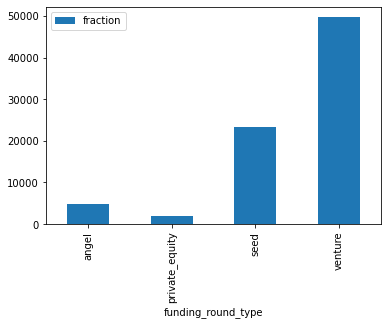

In [61]:
# Plotting a bar chart between funding_round_type and fraction of total investment to total investment average value
modified.plot(x='funding_round_type', y='fraction', kind='bar') 
plt.show()

`Apparently Spark Funds can go with 'Venture' as their investment type`

In [62]:
# From Checkpoint 2: Funding type analysis we already created master_frame_venture dataframe
# Creating top9_plot dataframe by grouping master_frame_venture by country_code and summing all values and sorting them
top9_plot = master_frame_venture.groupby('country_code').sum()
top9_plot = top9_plot.apply(lambda x : x.sort_values(ascending = False))
top9_plot = top9_plot.head(9)

In [63]:
# Resetting top9_plot index as 'modified_top9_plot' dataframe
modified_top9_plot = top9_plot.reset_index()

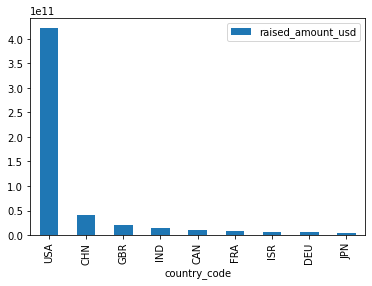

In [64]:
# Plotting a bar chart between country_code and raised_amount_usd
modified_top9_plot.plot(x='country_code', y='raised_amount_usd', kind='bar') 
plt.show()

`Spark Funds wants to invest only in English Speaking countries because of the ease of communication`<br>
`So USA, GBR, IND were chosen to be the top 3 English speaking countries`<br><br>
`The list of English speaking countries. Click `
[here](https://en.wikipedia.org/wiki/List_of_territorial_entities_where_English_is_an_official_language)

In [65]:
# Creating a pivot table for main_sector and investments count for D1 data frame
D1_Pivot = pd.pivot_table(data=D1, index='main_sector', values='city', aggfunc='count').reset_index().rename(columns={'city': 'total_USA'}).round(1)

In [66]:
# Creating a pivot table for main_sector and investments count for D2 data frame
D2_Pivot = pd.pivot_table(data=D2, index='main_sector', values='city', aggfunc='count').reset_index().rename(columns={'city': 'total_GBR'}).round(1)

In [67]:
# Creating a pivot table for main_sector and investments count for D3 data frame
D3_Pivot = pd.pivot_table(data=D3, index='main_sector', values='city', aggfunc='count').reset_index().rename(columns={'city': 'total_IND'}).round(1)

In [68]:
# Sorting values by total_USA, total_GBR, total_IND
D1_Pivot = D1_Pivot.sort_values(by='total_USA',ascending=False)
D2_Pivot = D2_Pivot.sort_values(by='total_GBR',ascending=False)
D3_Pivot = D3_Pivot.sort_values(by='total_IND',ascending=False)

In [69]:
# Fetching the top 3 sectors in USA
D1_Pivot = D1_Pivot.head(3)
D1_Pivot

,main_sector,total_USA
6,Others,2422
7,"Social, Finance, Analytics, Advertising",2213
1,Cleantech / Semiconductors,1949


In [70]:
# Fetching the top 3 sectors in GBR
D2_Pivot = D2_Pivot.head(3)
D2_Pivot

,main_sector,total_GBR
6,Others,128
7,"Social, Finance, Analytics, Advertising",115
1,Cleantech / Semiconductors,114


In [71]:
# Fetching the top 3 sectors in IND
D3_Pivot = D3_Pivot.head(3)
D3_Pivot

,main_sector,total_IND
6,Others,78
7,"Social, Finance, Analytics, Advertising",45
5,"News, Search and Messaging",41


```Identified the best sectors, countries, and a suitable investment type for Spark Funds, an asset management company for making investments in few companies. This analysis will help Spark Funds to understand the global trends in investments in taking the investment decisions effectively.```